# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [4]:
#Your code here
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [1]:
!gdown 1hMET4j7T_4MGj4q69rnnsmFz1nZHuQeT

Downloading...
From (original): https://drive.google.com/uc?id=1hMET4j7T_4MGj4q69rnnsmFz1nZHuQeT
From (redirected): https://drive.google.com/uc?id=1hMET4j7T_4MGj4q69rnnsmFz1nZHuQeT&confirm=t&uuid=0fd55da9-6034-4545-a3ee-e0db1bc0cf19
To: /content/data_03.zip
100% 229M/229M [00:09<00:00, 24.0MB/s]


In [3]:
!unzip -q data_03.zip

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [65]:
data_dir = "/content/data"

In [66]:
seed = 42

In [67]:
# data=# Creating a Dataset for the Training data
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = "categorical",
    class_names = ["Cheetah", "Crocodile", "Elephants", "Tiger"],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [68]:
data_iterator=data.as_numpy_iterator()

In [74]:
batch=data_iterator.next()

In [70]:
class_names = ["Cheetah", "Crocodile", "Elephants", "Tiger"]
labels = [class_names[label.argmax()] for label in batch[1]]
print(labels)

['Cheetah', 'Crocodile', 'Cheetah', 'Crocodile', 'Elephants', 'Elephants', 'Crocodile', 'Tiger', 'Elephants', 'Tiger', 'Tiger', 'Cheetah', 'Tiger', 'Elephants', 'Crocodile', 'Elephants']


Run the below code and batch code 2-3 times to visualise the labels given to different animals.

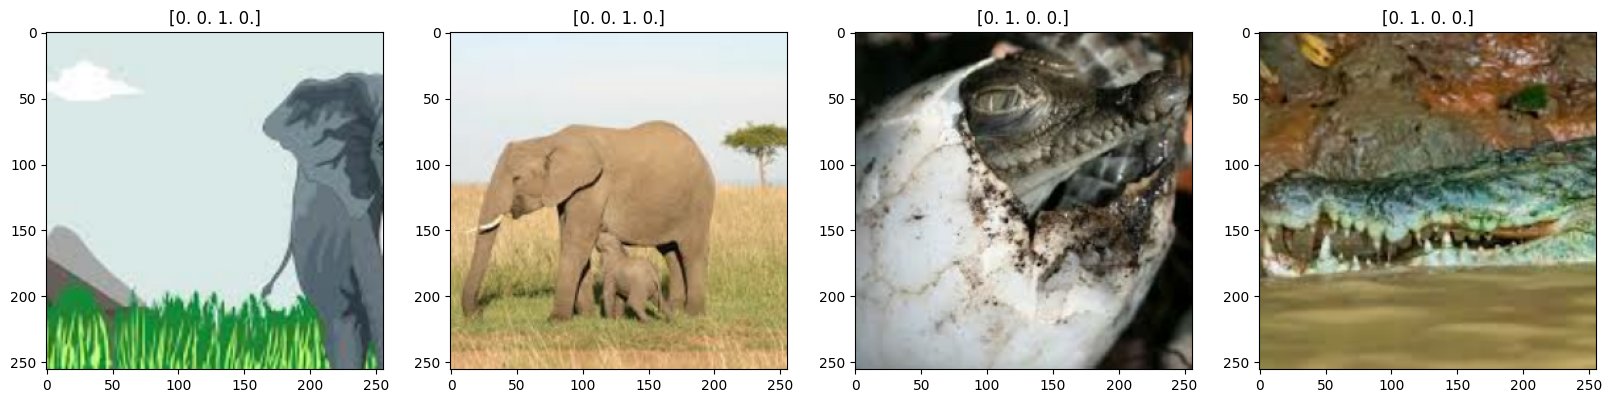

In [75]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [76]:
data=data.map(lambda x, y: (x / 255.0, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [77]:
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Split the dataset
train_data = data.take(train_size)
test_data = data.skip(train_size).take(test_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [82]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), strides=1, padding='same', input_shape=(256, 256, 3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, (5, 5), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(512, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(2048))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(len(class_names), activation='softmax'))

**Q.6** Compile your model

In [83]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [88]:
model.fit(
    train_data,
    validation_data=test_data,
    epochs=25 #(initially did 20)
)

Epoch 1/5
93/93 [==============================] - 23s 245ms/step - loss: 0.5384 - accuracy: 0.8737 - val_loss: 1.9687 - val_accuracy: 0.6687
Epoch 2/5
93/93 [==============================] - 22s 228ms/step - loss: 0.9165 - accuracy: 0.8051 - val_loss: 2.4372 - val_accuracy: 0.6125
Epoch 3/5
93/93 [==============================] - 23s 239ms/step - loss: 0.6622 - accuracy: 0.8253 - val_loss: 0.7450 - val_accuracy: 0.8313
Epoch 4/5
93/93 [==============================] - 23s 241ms/step - loss: 0.5206 - accuracy: 0.8737 - val_loss: 1.7539 - val_accuracy: 0.6938
Epoch 5/5
93/93 [==============================] - 22s 234ms/step - loss: 0.5142 - accuracy: 0.8669 - val_loss: 0.5083 - val_accuracy: 0.8687


**Q.8** Test your code with test set

In [89]:
loss, accuracy = model.evaluate(test_data)

10/10 [==============================] - 9s 36ms/step - loss: 0.4525 - accuracy: 0.8938


In [90]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.893750011920929


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**